Project 2

Andrew Grover - 117805567

Calvin Pitney - 114198709

In [197]:
# Problem 1
import sqlite3
import pandas
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

sqlite_file = '/content/lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

# Gather the winning percentages and payrolls for each year for each team
salary_query = "SELECT teamID, yearID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID"
wins_query = "SELECT teamID, yearID, CAST(SUM(W) AS FLOAT)/SUM(G)*100 as winning_percentage FROM Teams GROUP BY teamID, yearID"



team_salaries = pandas.read_sql(salary_query, conn)
team_salaries.head()
wins = pandas.read_sql(wins_query, conn)
wins.head()
salwindata = team_salaries.merge(wins, on= ("teamID", "yearID"), how='inner')
salwindata



,teamID,yearID,total_payroll,winning_percentage
0,ATL,1985,14807000.0,40.740741
1,BAL,1985,11560712.0,51.552795
2,BOS,1985,10897560.0,49.693252
3,CAL,1985,14427894.0,55.555556
4,CHA,1985,9846178.0,52.147239
...,...,...,...,...
853,SLN,2014,120693000.0,55.555556
854,TBA,2014,72689100.0,47.530864
855,TEX,2014,112255059.0,41.358025
856,TOR,2014,109920100.0,51.234568


For the team_salaries table we summed up the salaries of each team for each year. For the wins table we divided the number of wins by games played to form a winning percentage for each team for each year. We used an inner join on the two tables to ensure there will be no missing data because it will only join on years/teams that both tables contain.

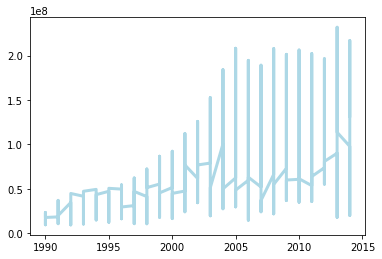

In [198]:
# Problem 2
x = []

y = []

for i, row in team_salaries.iterrows():
  # Select years 1990-2014
  if team_salaries.at[i,'yearID'] > 1989 and team_salaries.at[i,'yearID'] < 2015:
    x.append(team_salaries.at[i, 'yearID'])
    y.append(team_salaries.at[i, 'total_payroll'])

# Configure plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color= 'lightblue', linewidth=3)

# Save and show
plt.savefig('Payroll over years')
plt.show()

Question 1: According to the above plot, the mean payrolls have increased over time (from 1990 to 2014).

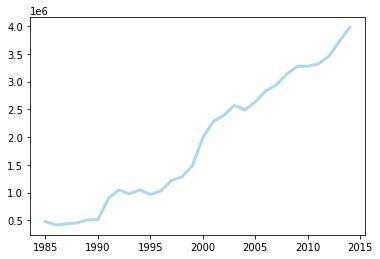

In [199]:
# Problem 3
meanSalary_query = "SELECT yearID, AVG(salary) as mean_payroll FROM Salaries GROUP BY yearID"
mean_salaries = pandas.read_sql(meanSalary_query, conn)








  
df22= team_salaries.merge(mean_salaries, on= ( "yearID"), how='inner')
x2 = df22['yearID']
y2= df22['mean_payroll']


# Configure plot
fig2 = plt.figure()




ax2 = fig2.add_subplot(111)
ax2.plot(x2, y2, color= 'lightblue', linewidth=3)


# Save and show
plt.savefig('Mean payroll over years')
plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


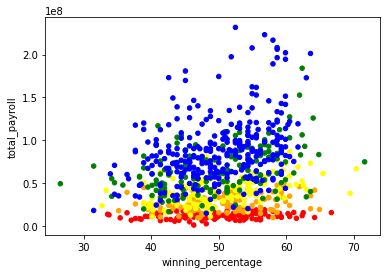

In [200]:
# Problem 4
# make a scatterplot showing mean winning percentage (y-axis) vs. mean payroll (x-axis) for each of the five time periods


yearcolorcat = []
for x, rpw in salwindata.iterrows():
  if (salwindata.at[x,'yearID'] >= 1985) and (salwindata.at[x,'yearID'] < 1990):
    yearcolorcat.append('red')
  else:
    if salwindata.at[x, 'yearID'] >= 1990 and salwindata.at[x, 'yearID'] < 1995:
      yearcolorcat.append('orange')
    else:
      if salwindata.at[x, 'yearID'] >= 1995 and salwindata.at[x, 'yearID'] < 2000:
        yearcolorcat.append('yellow')
      else:
        if salwindata.at[x, 'yearID'] >= 2000 and salwindata.at[x, 'yearID'] < 2005:
          yearcolorcat.append('green')
        else:
            yearcolorcat.append('blue')

df4 = salwindata.copy()  

df4.join(pandas.DataFrame(yearcolorcat))



ax1 = df4.plot.scatter(x='winning_percentage', y='total_payroll', c=yearcolorcat)

Red 1985-1989
Orange 1990-1994
Yellow 1995-1999
Green 2000-2004
Blue 2005-2014

As You can see the salaries across the league in 1985 were similar, and seemed not to corelate with winning percentage. As time goes on, high salaries start to corelate with more wins and lower salaries with less wins, although there are some outliers. We can see this because the right side of the graph is rising more than the left side of the graph as time increases and the colors get cooler.


In [201]:
# Problem 5
import statistics
import math


newCol = []
sdCalc = 0
mean = statistics.mean(team_salaries['total_payroll'])
yr = -1
yrIndex = -1
yrdict = {}
df = team_salaries.merge(mean_salaries, on= ( "yearID"), how='inner')

for i,row in df.iterrows():
    yrdict[df.at[i,'yearID']] = (df.at[i, 'total_payroll'] - df.at[i, 'mean_payroll']) ** 2

df2 = salwindata.merge(mean_salaries, on= ( "yearID"), how='inner')

for i,row in salwindata.iterrows():
  if salwindata.at[i, 'yearID'] != yr:
    yr = salwindata.at[i, 'yearID']
    yrIndex += 1
  newCol.append((df2.at[i, 'total_payroll'] - df2.at[yrIndex, 'mean_payroll']) / math.sqrt(yrdict[yr] / df2.shape[0]))
salwindata['standardized_payroll'] = newCol

# New Section

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


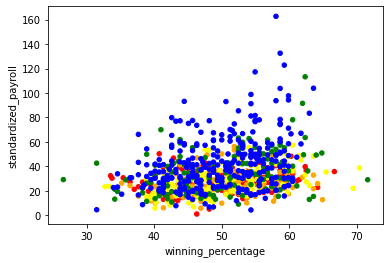

In [202]:
# Problem 6


yearcolorcat = []
for x, rpw in salwindata.iterrows():
  if (salwindata.at[x,'yearID'] >= 1985) and (salwindata.at[x,'yearID'] < 1990):
    yearcolorcat.append('red')
  else:
    if salwindata.at[x, 'yearID'] >= 1990 and salwindata.at[x, 'yearID'] < 1995:
      yearcolorcat.append('orange')
    else:
      if salwindata.at[x, 'yearID'] >= 1995 and salwindata.at[x, 'yearID'] < 2000:
        yearcolorcat.append('yellow')
      else:
        if salwindata.at[x, 'yearID'] >= 2000 and salwindata.at[x, 'yearID'] < 2005:
          yearcolorcat.append('green')
        else:
            yearcolorcat.append('blue')


df4 = salwindata.copy()  


df4.join(pandas.DataFrame(yearcolorcat))






ax1 = df4.plot.scatter(x='winning_percentage', y='standardized_payroll', c=yearcolorcat)


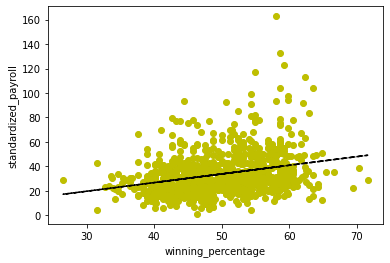

In [203]:
# Problem 7
df7 = salwindata.copy()  

ax7 = df7.plot.scatter(x='winning_percentage', y='standardized_payroll', c='blue')

x = df7['winning_percentage']
y = df7['standardized_payroll']


coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y


plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

In [204]:
# Problem 8

efficiency = []

for i, rows in salwindata.iterrows():
  efficiency.append(salwindata.at[i, 'winning_percentage'] - 
                    (50 + 2.5*(salwindata.at[i, 'standardized_payroll'])))
  
df8 = salwindata.copy()
df8.join(pandas.DataFrame(efficiency))

print(df8)
  
ax8 = salwindata.line(x='yearID',y='efficiency')

    teamID  yearID  total_payroll  winning_percentage  standardized_payroll
0      ATL    1985     14807000.0           40.740741             50.354734
1      BAL    1985     11560712.0           51.552795             38.948036
2      BOS    1985     10897560.0           49.693252             36.617875
3      CAL    1985     14427894.0           55.555556             49.022644
4      CHA    1985      9846178.0           52.147239             32.923564
..     ...     ...            ...                 ...                   ...
853    SLN    2014    120693000.0           55.555556             27.523341
854    TBA    2014     72689100.0           47.530864             16.538362
855    TEX    2014    112255059.0           41.358025             25.592443
856    TOR    2014    109920100.0           51.234568             25.058123
857    WAS    2014    131983680.0           59.259259             30.107045

[858 rows x 5 columns]


AttributeError: ignored